Setup
-------------
import packages,
load pre-trained net,
load data

In [24]:
# setup
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model
import joblib
%matplotlib inline


#load data
X_raw = joblib.load('data/Simulated/X_data.pkl')
Y_raw = joblib.load('data/Simulated/Y_data.pkl')


Load VCE bottleneck neuron activations for gamma=1 (g=0), beta=.01 (b=2)
-----------------------------------------

In [25]:
#load activation vectors for X and Y samples
X_activ_b2 = joblib.load('results/Simulated/variables/XtoYg0b2.pkl')
Y_activ_b2 = joblib.load('results/Simulated/variables/YtoXg0b2.pkl')
#transposed, i.e. ordere by neuron
X_activ_b2T = np.transpose(X_activ_b2)
Y_activ_b2T = np.transpose(Y_activ_b2)

print('shape of activation data: ', np.shape(X_activ_b2))

#load noise stds of VAE
X_std_b2 = np.transpose(joblib.load('results/Simulated/vce_stds/XtoYg0b2.pkl'))
Y_std_b2 = np.transpose(joblib.load('results/Simulated/vce_stds/YtoXg0b2.pkl'))

shape of activation data:  (10000, 4)


### Plot distribution of activations

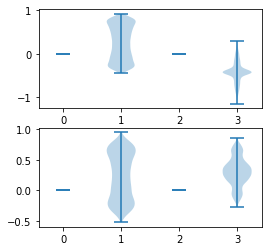

In [26]:
fig = plt.figure(figsize=(4,4))
a1 = plt.subplot2grid((2,1), (0,0))
a1.violinplot(tuple(X_activ_b2T)) #X
a1.set_xticks(np.arange(1, 5)); a1.set_xticklabels(np.arange(4))
a2 = plt.subplot2grid((2,1), (1,0))
a2.violinplot(tuple(Y_activ_b2T)) #Y
a2.set_xticks(np.arange(1, 5)); a2.set_xticklabels(np.arange(4))
plt.show()

### Plot distribution of noise STDs

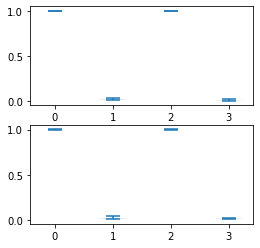

In [27]:
fig = plt.figure(figsize=(4,4))
a1 = plt.subplot2grid((2,1), (0,0))
a1.violinplot(tuple(X_std_b2)) #X
a1.set_xticks(np.arange(1, 5)); a1.set_xticklabels(np.arange(4))
a2 = plt.subplot2grid((2,1), (1,0))
a2.violinplot(tuple(Y_std_b2)) #Y
a2.set_xticks(np.arange(1, 5)); a2.set_xticklabels(np.arange(4))
plt.show() 

In [28]:
#select variable neurons
Xvar_b2 = [i for i, e in enumerate(np.mean(X_std_b2, axis=1)) if e < .95]    # X variables
Yvar_b2 = [i for i, e in enumerate(np.mean(Y_std_b2, axis=1)) if e < .95]    # Y variables

X_var_b2 = X_activ_b2[:,Xvar_b2]
Y_var_b2 = Y_activ_b2[:,Yvar_b2]

## Visualize Y variables through samples

In [29]:
#list of samples with 4 high and 4 low activations per neuron
Yb2_4high4low = list(np.append(Y_activ_b2T[i].argsort()[-4:], Y_activ_b2T[i].argsort()[:4]) 
                     for i in range(np.shape(Y_activ_b2T)[0]))

### show highest/lowest activation samples for both variables

high activation samples (left):  [2280   58 3439 5172]
low activation samples (right):  [ 115 7528 7507  112]
activations: [ 0.934  0.937  0.945  0.949 -0.528 -0.526 -0.516 -0.507]


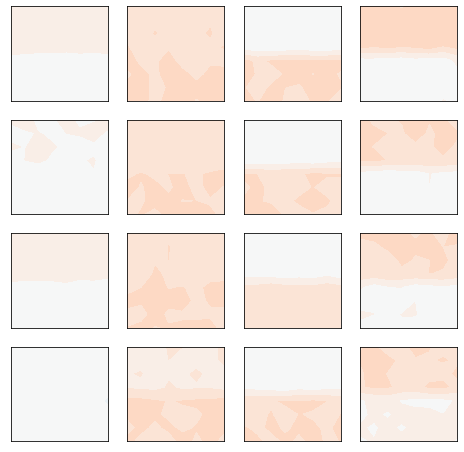

In [30]:

neuron1 = Yvar_b2[0]         ## choose neuron

samples1 = Yb2_4high4low[neuron1]
print('high activation samples (left): ', samples1[:4])
print('low activation samples (right): ', samples1[4:])
print('activations:',np.round(Y_activ_b2T[neuron1][samples1],3))

#plots
fig = plt.figure(figsize=(8,8), facecolor='white')
imshape = (8, 8)
levels = np.linspace(-10,12,30)

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 0))
    sample = Y_raw[samples1[i]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdBu')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 1))
    sample = Y_raw[samples1[i+4]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdBu')
    ax.set_xticks([]); ax.set_yticks([])


neuron2 = Yvar_b2[1] 

samples2 = Yb2_4high4low[neuron2]
for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 2))
    sample = Y_raw[samples2[i]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdBu')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 3))
    sample = Y_raw[samples2[i+4]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdBu')
    ax.set_xticks([]); ax.set_yticks([])

## Visualize X variables through samples

In [31]:
#list of samples with 4 high and 4 low activations per neuron
Xb2_4high4low = list(np.append(X_activ_b2T[i].argsort()[-4:], X_activ_b2T[i].argsort()[:4]) 
                     for i in range(np.shape(X_activ_b2T)[0]))

### show highest/lowest activation samples for both variables

high activation samples (left):  [2126 9067 3102 5172]
low activation samples (right):  [7707  194 8590 5395]
activations: [ 0.907  0.908  0.909  0.917 -0.435 -0.433 -0.422 -0.419]


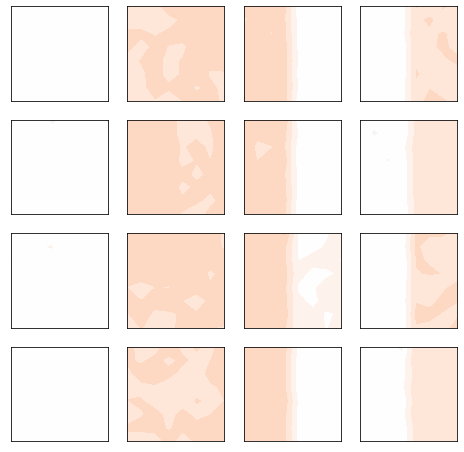

In [32]:

neuron1 = Xvar_b2[0]         ## choose neuron

samples1 = Xb2_4high4low[neuron1]
print('high activation samples (left): ', samples1[:4])
print('low activation samples (right): ', samples1[4:])
print('activations:',np.round(X_activ_b2T[neuron1][samples1],3))

#plots
fig = plt.figure(figsize=(8,8), facecolor='white')
imshape = (8, 8)
levels = np.linspace(-10,12,30)

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 0))
    sample = X_raw[samples1[i]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdGy')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 1))
    sample = X_raw[samples1[i+4]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdGy')
    ax.set_xticks([]); ax.set_yticks([])


neuron2 = Xvar_b2[1] 

samples2 = Xb2_4high4low[neuron2]
for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 2))
    sample = X_raw[samples2[i]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdGy')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,4), (i, 3))
    sample = X_raw[samples2[i+4]].reshape(imshape).T
    im = ax.contourf(np.arange(8), np.arange(8), sample, levels=levels, cmap='RdGy')
    ax.set_xticks([]); ax.set_yticks([])

Scatter X vs Y variables
-----------------

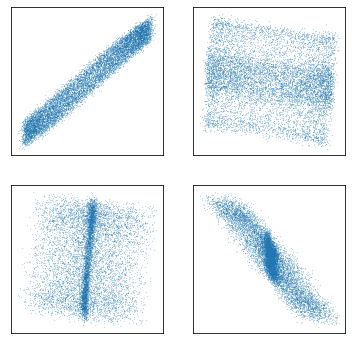

In [33]:
lenX = len(Xvar_b2)
lenY = len(Yvar_b2)
# plot
fig = plt.figure(figsize=(6,6))
for i in range(lenX):
    for j in range(lenY):
        ax = plt.subplot2grid((lenX,lenY), (i, j)) #(row,column)
        plt.scatter(X_activ_b2T[Xvar_b2[i]], Y_activ_b2T[Yvar_b2[j]], marker='.', s=.04)
        ax.set_xticks([]); ax.set_yticks([])

## Scatter detected variables against true variables

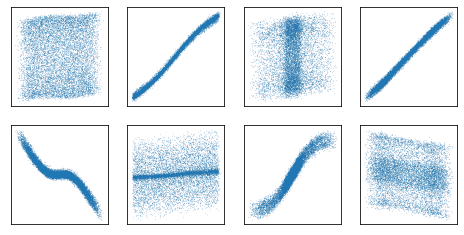

In [34]:
X1_true,X2_true,Y1_true,Y2_true,_ = np.transpose(joblib.load('data/Simulated/true_variables.pkl'))

plt.figure(figsize=(8,4))

for i in range(lenX):
    ax = plt.subplot2grid((2,4), (i, 0))
    plt.scatter(X1_true, X_activ_b2T[Xvar_b2[i]], marker='.', s=.02)
    ax.set_xticks([]); ax.set_yticks([])
for i in range(lenX):
    ax = plt.subplot2grid((2,4), (i, 1))
    plt.scatter(X2_true, X_activ_b2T[Xvar_b2[i]], marker='.', s=.02)
    ax.set_xticks([]); ax.set_yticks([])
for i in range(lenY):
    ax = plt.subplot2grid((2,4), (i, 2))
    plt.scatter(Y1_true, Y_activ_b2T[Yvar_b2[i]], marker='.', s=.02)
    ax.set_xticks([]); ax.set_yticks([])
for i in range(lenY):
    ax = plt.subplot2grid((2,4), (i, 3))
    plt.scatter(Y2_true, Y_activ_b2T[Yvar_b2[i]], marker='.', s=.02)
    ax.set_xticks([]); ax.set_yticks([])

# ANM visualization

## Originally detected variables

### Setup

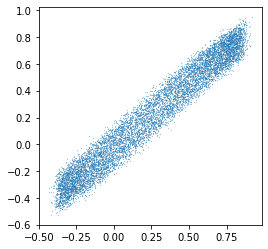

In [35]:

pair = 0           # choose variable pair

xv = Xvar_b2[pair]
yv = Yvar_b2[pair]
x = X_activ_b2T[xv].reshape(-1,1)
y = Y_activ_b2T[yv].reshape(-1,1)

plt.figure(figsize=(4,4))
plt.scatter(X_activ_b2T[xv,:], Y_activ_b2T[yv,:], marker='.', s=.1)

### linear model

In [36]:
#predict y from x
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
y_pred_lm = lm.predict(x)
y_res = y - y_pred_lm

#predict x from y
lm = linear_model.LinearRegression()
model = lm.fit(y, x)
x_pred_lm = lm.predict(y)
x_res = x - x_pred_lm

### Plot for pair=2

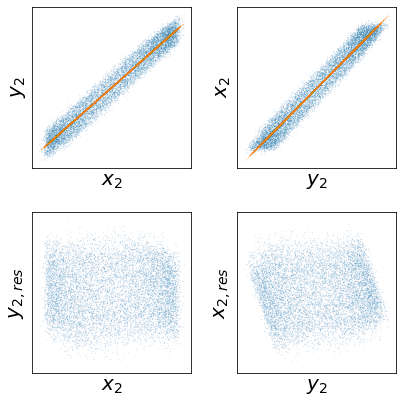

In [37]:
v2 = Xvar_b2[0]
fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 20})
#x vs y, y_pred
ax = plt.subplot2grid((2,2), (0, 0))
plt.scatter(X_activ_b2T[v2,:], Y_activ_b2T[v2,:], marker='.', s=.01)
plt.scatter(X_activ_b2T[v2,:], y_pred_lm, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$x_2$'); ax.set_ylabel('$y_2$')
#y vs x, x_pred
ax = plt.subplot2grid((2,2), (0, 1))
plt.scatter(Y_activ_b2T[v2,:], X_activ_b2T[v2,:], marker='.', s=.01)
plt.scatter(Y_activ_b2T[v2,:], x_pred_lm, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$y_2$'); ax.set_ylabel('$x_2$')
#x vs y_res
ax = plt.subplot2grid((2,2), (1, 0))
plt.scatter(x, y_res.reshape(-1,1), marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$x_2$'); ax.set_ylabel('$y_{2,res}$')
#y vs x_res
ax = plt.subplot2grid((2,2), (1, 1))
plt.scatter(y, x_res.reshape(-1,1), marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$y_2$'); ax.set_ylabel('$x_{2,res}$')
plt.tight_layout()
#fig.savefig('synth_scatter_ANM_pre.png')

## Transformed variables

### Load transformed variables (neurons 1 and 3)

In [38]:
n1x_x, n1x_y = joblib.load('results/Simulated/transformed_variables/trans_xy_xg0b2n1.pkl') #causal
n1y_y, n1y_x = joblib.load('results/Simulated/transformed_variables/trans_xy_yg0b2n1.pkl')

n3x_x, n3x_y = joblib.load('results/Simulated/transformed_variables/trans_xy_xg0b2n3.pkl') #common cause
n3y_y, n3y_x = joblib.load('results/Simulated/transformed_variables/trans_xy_yg0b2n3.pkl')


### select variable pair (here neuron 1)

In [39]:
xx = n1x_x.detach().numpy(); xy = n1x_y.detach().numpy()
yx = n1y_x.detach().numpy(); yy = n1y_y.detach().numpy()

### linear model

In [40]:
#predict y from x
lm = linear_model.LinearRegression()
model = lm.fit(xx, xy)
y_pred = lm.predict(xx)
y_res = xy - y_pred

#predict x from y
lm = linear_model.LinearRegression()
model = lm.fit(yy, yx)
x_pred = lm.predict(yy)
x_res = yx - x_pred

### Plot for pair=2, optimised for HSIC(y, x_res)

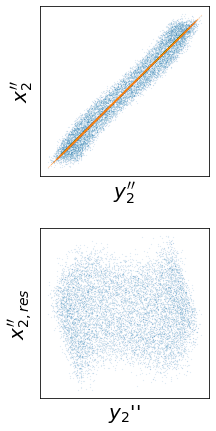

In [41]:
fig = plt.figure(figsize=(3.4,6.4))
plt.rcParams.update({'font.size': 20})
#y vs x, x_pred
ax = plt.subplot2grid((2,1), (0, 0))
plt.scatter(yy, yx, marker='.', s=.01)
plt.scatter(yy, x_pred, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$y_2\'\'$'); ax.set_ylabel('$x_2\'\'$')
#y vs x_res
ax = plt.subplot2grid((2,1), (1, 0))
plt.scatter(yy, x_res, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$y_2$\'\''); ax.set_ylabel('$x_{2, res}\'\'$')
plt.tight_layout()

### Plot for pair=2, optimised for HSIC(x, y_res)

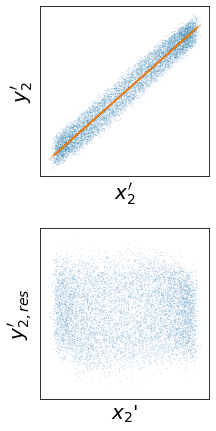

In [42]:
fig = plt.figure(figsize=(3.4,6.4))
plt.rcParams.update({'font.size': 20})
#x vs y, y_pred
ax = plt.subplot2grid((2,1), (0, 0))
plt.scatter(xx, xy, marker='.', s=.01)
plt.scatter(xx, y_pred, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$x_2\'$'); ax.set_ylabel('$y_2\'$')
#x vs y_res
ax = plt.subplot2grid((2,1), (1, 0))
plt.scatter(xx, y_res, marker='.', s=.01)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('$x_2$\''); ax.set_ylabel('$y_{2, res}\'$')
plt.tight_layout()